In [1]:
import hist
import pickle as pkl
from unfold_utils.unfolder import *
import ipywidgets as widgets
from IPython.display import display
from unfold_utils.draw_tools import * 
from unfold_utils.integrate_and_rebin import *
import mplhep as hep

import matplotlib.pyplot as plt
import matplotlib as mpl

# Set the color cycle to 'tab10', which has 10 distinct colors
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=plt.cm.tab10.colors)

# plt.cm.Set3.colors → 12 pastel colors
# plt.cm.Paired.colors → 12 high-contrast colors
# plt.cm.Dark2.colors → 8 dark, distinguishable colors (not exactly 10)
# plt.cm.Accent.colors → 8 colors
# plt.cm.tab20.colors → 20 colors (if you need more variety)

In [2]:
title_list = [ r"$p_T$ 200-290 GeV",  r"$p_T$ 290-400 GeV",  r"$p_T$ 400-480 GeV",  r"$p_T$ 480-$\infty$ GeV"]
color_pt = ["#1f77b4", "#d62728", "#2ca02c", "#ff7f0e"]

In [10]:
closure  = False
groomed = False

In [11]:
ww16 =  (36330  * 75.95) /(15688000.0 + 15054400.0)

wz16 =  (36330  * 27.6)/( 7584000.0 + 7584000.0)

zz16 = (36330  * 12.17)/( 712000.0 + 1151000.0)

ww17 = (36330  * 75.95)/15154000.0
wz17 = (41480 * 27.6)/7789250.0
zz17 = (41480* 12.17 )/2022000.0

ww18 = (41480 * 75.95	)/9983800.0
wz18 = (41480 * 27.6)/10075000.0
zz18 = (41480* 12.17 )/1936000.0

f_prefix = 'plots/zjet/'

In [12]:
with open('latest_pkl/mc_syst_1004.pkl', "rb") as f:
    output_pythia= pkl.load( f )
with open("latest_pkl/data_combined_1004.pkl", "rb") as f:
    output_data = pkl.load( f )

with open("latest_pkl/herwig_0703.pkl", "rb") as f:
    output_herwig = pkl.load( f )
    
with open('latest_pkl/backgrounds_0703.pkl', "rb") as f:
    output_bg= pkl.load( f )

with open('latest_pkl/pythia_jk_0703.pkl', "rb") as f:
    output_jk= pkl.load( f )

with open('latest_pkl/data_jk_0903.pkl', "rb") as f:
    output_data_jk= pkl.load( f )
    




# with open("latest_pkl/mc_herwig_1004.pkl", "rb") as f:
#     output_herwig = pkl.load( f )
    
# with open('latest_pkl/backgrounds_0703.pkl', "rb") as f:
#     output_bg= pkl.load( f )

# with open('latest_pkl/pythia_jk_0703.pkl', "rb") as f:
#     output_jk= pkl.load( f )

if not groomed:
    resp_matrix_4d = output_pythia['response_matrix_u']
    input_data = output_data['ptjet_mjet_u_reco']
    fakes = output_pythia['fakes_u']
    misses = output_pythia['misses_u']
    hist_bg = output_bg['response_matrix_u'].project('dataset','ptreco','mreco')
    resp_matrix_pythia = resp_matrix_4d
    resp_matrix_4d_herwig  = output_herwig['response_matrix_u'][{'systematic':['herwig']}]
    fakes_herwig = output_herwig['fakes_u']
    misses_herwig = output_herwig['misses_u']
    input_data_jk = output_data_jk["jk_ptjet_mjet_u_reco"]
else:
    resp_matrix_4d = output_pythia['response_matrix_g']
    input_data = output_data['ptjet_mjet_g_reco']
    fakes = output_pythia['fakes_g']
    misses = output_pythia['misses_g']
    hist_bg = output_bg['response_matrix_u'].project('dataset','ptreco','mreco')
    resp_matrix_pythia = resp_matrix_4d
    resp_matrix_4d_herwig = output_herwig['response_matrix_g'][{'systematic':['herwig']}]
   
    fakes_herwig = output_herwig['fakes_g']
    misses_herwig = output_herwig['misses_g']
    input_data_jk = output_data_jk["jk_ptjet_mjet_g_reco"]

In [13]:
resp_matrix_4d.axes['mreco'].edges

array([0.0e+00, 2.5e+00, 5.0e+00, 7.5e+00, 1.0e+01, 1.5e+01, 2.0e+01,
       3.0e+01, 4.0e+01, 5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01,
       1.0e+02, 1.1e+02, 1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02,
       1.7e+02, 1.8e+02, 1.9e+02, 2.0e+02, 5.0e+02, 1.3e+04])

In [14]:
if not groomed:
    edges = [ 0, 10, 2.0e+01, 30,   4.0e+01,
           5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02, 1.1e+02,
           1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 180, 200,  500,  1.3e+04]
    
    edges_gen = [ 0,  2.0e+01, 4.0e+01, 6.0e+01, 8.0e+01, 1.0e+02,
           1.2e+02, 1.4e+02, 1.6e+02,  200,  1.3e+04]
if groomed:
    edges = [ 0, 5, 10,  15, 2.0e+01, 30,   4.0e+01,
           5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02, 1.1e+02,
           1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 180, 200,  500,  1.3e+04]
    
    edges_gen = [ 0, 10, 2.0e+01, 4.0e+01, 6.0e+01, 8.0e+01, 1.0e+02,
           1.2e+02, 1.4e+02, 1.6e+02,  200,  1.3e+04]


pt_edges = [200, 290, 400, 13000]

npt = len(pt_edges) - 1
resp_matrix_4d = rebin_hist(resp_matrix_4d, 'ptreco', pt_edges)
resp_matrix_4d = rebin_hist(resp_matrix_4d, 'ptgen', pt_edges)

resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mreco',edges )

resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mgen',edges_gen )
resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mreco',edges )
resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mgen',edges_gen )

resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'ptreco', pt_edges)
resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'ptgen', pt_edges)




fakes =  rebin_hist(fakes, 'mreco',edges )
misses = rebin_hist(misses, 'mgen',edges_gen )

fakes = rebin_hist(fakes, 'ptreco', pt_edges)
#fakes = rebin_hist(fakes, 'ptgen', pt_edges)
#misses = rebin_hist(misses, 'ptreco', pt_edges)
misses = rebin_hist(misses, 'ptgen', pt_edges)

hist_bg = rebin_hist(hist_bg, 'ptreco', pt_edges)
#hist_bg = rebin_hist(hist_bg, 'ptgen', pt_edges)

hist_bg = rebin_hist(hist_bg, 'mreco',edges )


input_data = rebin_hist(input_data, 'ptreco', pt_edges)
#input_data = rebin_hist(input_data, 'ptgen', pt_edges)

input_data = rebin_hist(input_data, 'mreco',edges)

In [15]:
input_data_jk = rebin_hist(input_data_jk, 'mreco', resp_matrix_4d.axes['mreco'].edges )
input_data_jk = rebin_hist(input_data_jk, 'ptreco', resp_matrix_4d.axes['ptreco'].edges )

In [16]:
unfolder_orig = Unfolder(input_data, 
                    resp_matrix_4d[{'systematic':'nominal'}] ,
                    #resp_matrix_4d_jk,
                    fakes = fakes,
                    misses = misses,
                    #backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                    #systematics = {'JES_AbsoluteMPFBiasUp': resp_matrix_4d[{'systematic':'JES_AbsoluteMPFBiasUp'}].project('ptgen', 'mgen', 'ptreco', 'mreco').values()  },
                    #systematics = sys_matrix_dic,
                    systematics= None,
                    #systematics = jes_sys_list_up,
                    closure = closure,
                    groomed = groomed,
                    is_uf = True,
                    merge = False,
                    normalised_xs = True,
                    do_syst = True,
                    discard_low_bins = False,
                    regularisation= 'ScanSURE',
                    do_norm = False
                           )
unfolder_orig.perform_unfold()
orig_results = unfolder_orig.get_results()[0]

10
[    0.    20.    40.    60.    80.   100.   120.   140.   160.   200.
 13000.]
20
[0.0e+00 1.0e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01 7.0e+01 8.0e+01
 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02 1.6e+02 1.8e+02
 2.0e+02 5.0e+02 1.3e+04]
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.22558071
3.22558071
3.22558071
3.22558071
3.22558071
3.22558071
3.22558071
3.22558071
3.22558071
3.22558071
7.93939854
7.93939854
7.93939854
7.93939854
7.93939854
7.93939854
7.93939854
7.93939854
7.93939854
Detector Binning created
shape of you (60,)
Working until background subtractions
Unfolder object created
Regularisation USED ScanSURE
Tau value 2.3837149321413225e-05


/home/aritra/workspace/unfold/unfold_utils/unfolder.py:124: RuntimeWarning: invalid value encountered in divide
  self.underflow_frac = np.nan_to_num(h_np_underflow / self.M_np.sum(axis=0))
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:175: RuntimeWarning: invalid value encountered in divide
  self.miss_frac = self.miss_values/ ( self.M_np.sum(axis = 1))


Output Underflow 0.0, output overflow 0.0
248291.45279706956
403315.28519173176


Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).
Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 3 output bins do not depend on the input data  0 10 31
Info in <TUnfold::TUnfold>: 60 input bins and 29 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (signal:ptgen[200,290]:massgen[200,1.3e+04])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #31
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing signal regMode=3 densityMode=1 axisSteering=*[UOB]
Warning in <TUnfoldDensity::SetInput>: 5/60 input bins hav

In [18]:
if groomed:
    key = 'response_matrix_g'
else:
    key = 'response_matrix_u'

unfolded_list = []
for ijk in [0,1,2,3,4,5,6,7,8,9]:
    input_data = input_data_jk[:,:,ijk]
    input_data = (234412.0/input_data.sum()) * input_data
    unfolder = Unfolder(input_data_jk[:,:,ijk], 
                        resp_matrix_4d[{'systematic':'nominal'}] ,
                        #resp_matrix_4d_jk,
                        fakes = fakes,
                        misses = misses,
                        #backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                        #systematics = {'JES_AbsoluteMPFBiasUp': resp_matrix_4d[{'systematic':'JES_AbsoluteMPFBiasUp'}].project('ptgen', 'mgen', 'ptreco', 'mreco').values()  },
                        #systematics = sys_matrix_dic,
                        systematics= None,
                        #systematics = jes_sys_list_up,
                        closure = closure,
                        groomed = groomed,
                        is_uf = True,
                        merge = False,
                        normalised_xs = True,
                        do_syst = True,
                        discard_low_bins = False,
                        regularisation= 'ScanSURE',
                        do_norm = False
                               )
    unfolder.perform_unfold()
    unfolded_list.append(unfolder.get_results()[0][:3])


10
[    0.    20.    40.    60.    80.   100.   120.   140.   160.   200.
 13000.]
20
[0.0e+00 1.0e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01 7.0e+01 8.0e+01
 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02 1.6e+02 1.8e+02
 2.0e+02 5.0e+02 1.3e+04]
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.22558071
3.22558071
3.22558071
3.22558071
3.22558071
3.22558071
3.22558071
3.22558071
3.22558071
3.22558071
7.93939854
7.93939854
7.93939854
7.93939854
7.93939854
7.93939854
7.93939854
7.93939854
7.93939854
Detector Binning created
shape of you (60,)
Working until background subtractions
Unfolder object created
Regularisation USED ScanSURE
Tau value 3.2804270009709815e-05
Output Underflow 0.0, output overflow 0.0
194535.50221433543
315329.3487653323
10
[    0.    20.    40.    60.    80.   100.   120.   140.   160.   200.
 13000.]
20
[0.0e+00 1.0e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01 7.0e+01 8.0e+01
 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02 1.6e+02 1.8e+02
 2.0e+02 5.0e+

Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).
Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 3 output bins do not depend on the input data  0 10 31
Info in <TUnfold::TUnfold>: 60 input bins and 29 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (signal:ptgen[200,290]:massgen[200,1.3e+04])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #31
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing signal regMode=3 densityMode=1 axisSteering=*[UOB]
Warning in <TUnfoldDensity::SetInput>: 5/60 input bins hav

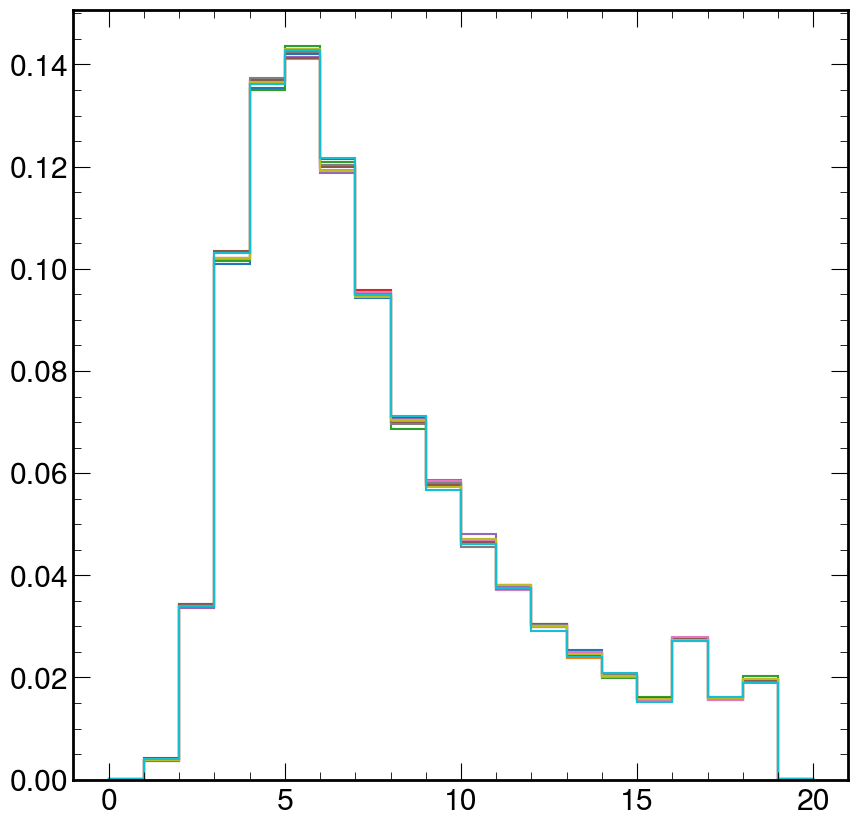

In [19]:
for ijk in [0,1,2,3,4,5,6,7,8,9]:
    hep.histplot(input_data_jk[2,:,ijk].values(), density = 1)
    

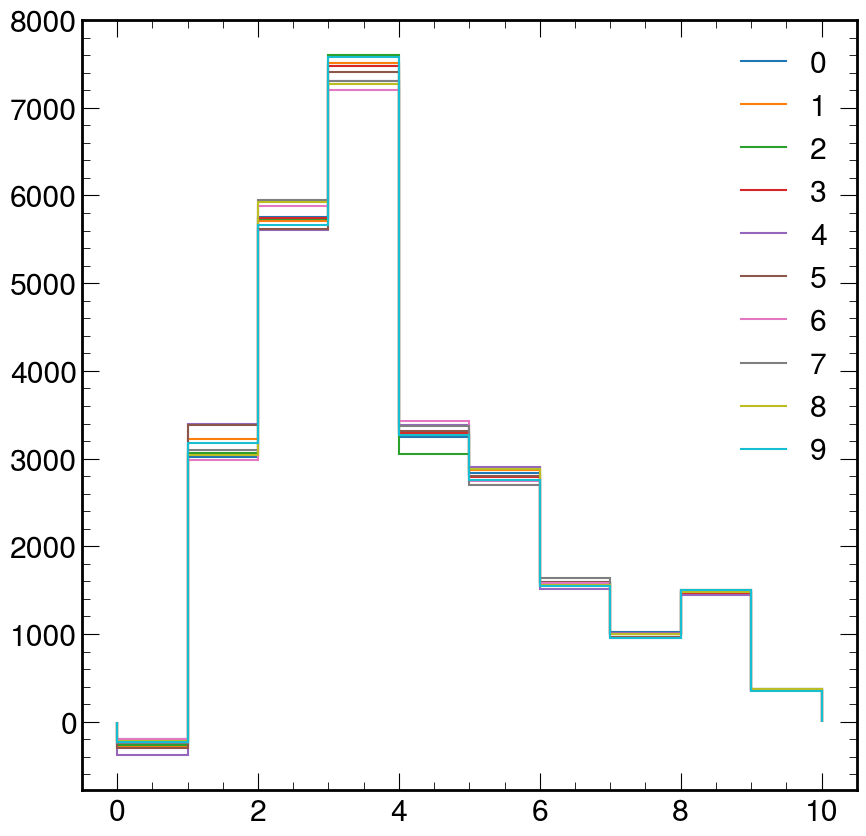

In [20]:
for ijk in range(len(unfolded_list)):
    hep.histplot(unfolded_list[ijk][2], label = str(ijk))
    plt.legend()

In [21]:
unfolded_list = np.array(unfolded_list)

std_list = np.std(unfolded_list, axis = 0)

In [23]:
std_list[2]

array([ 53.74510268, 140.65736865, 115.32435917, 132.4593257 ,
        94.90334207,  66.60512553,  32.51693369,  22.26616375,
        18.36435923,   7.75997882])

In [42]:
unfolded_list[3][3]

IndexError: index 3 is out of bounds for axis 0 with size 3

/tmp/ipykernel_1790/1797982446.py:3: RuntimeWarning: invalid value encountered in divide
  plt.stairs(std_list[ipt]/orig_results[ipt], label = str(ipt))


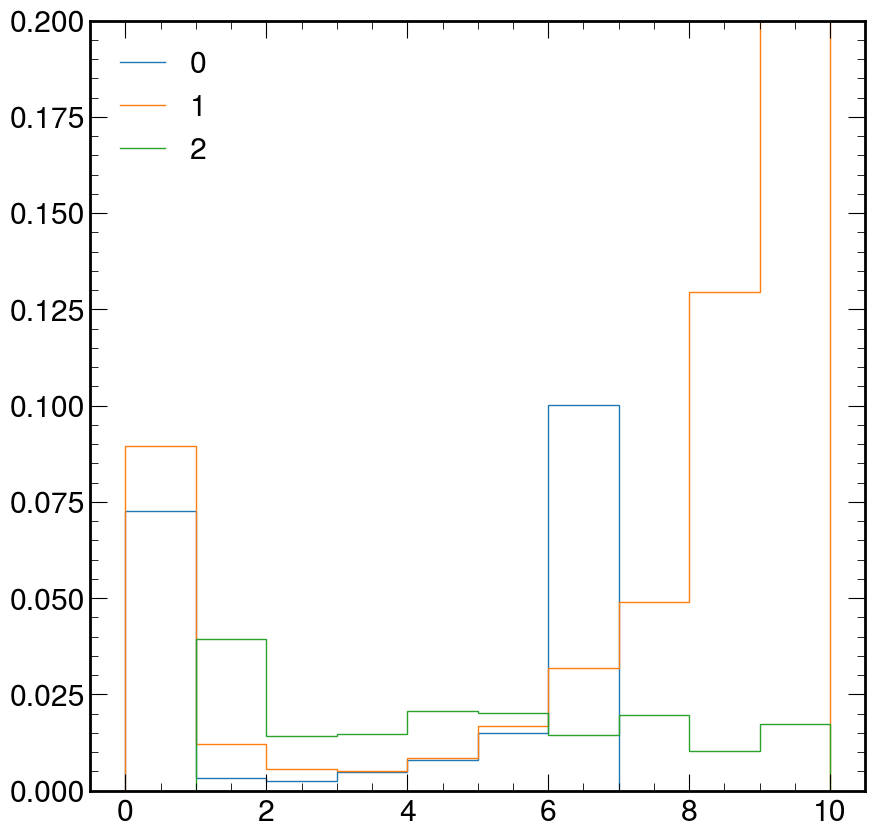

In [25]:
for ipt in range(3):
    plt.ylim(0,0.2)
    plt.stairs(std_list[ipt]/orig_results[ipt], label = str(ipt))
    plt.legend()

In [44]:
if not groomed:
    stat_mat = np.loadtxt("stat_mat_ungroomed.txt")
else:
    stat_mat = np.loadtxt("stat_mat_groomed.txt")
stat_input = std_list

In [50]:
stat_dic = {}
for ipt in range(3):
    stat_dic[ipt] = np.sqrt(stat_mat[ipt]**2 + stat_input[ipt]**2)

In [51]:
stat_input[0].shape

(11,)

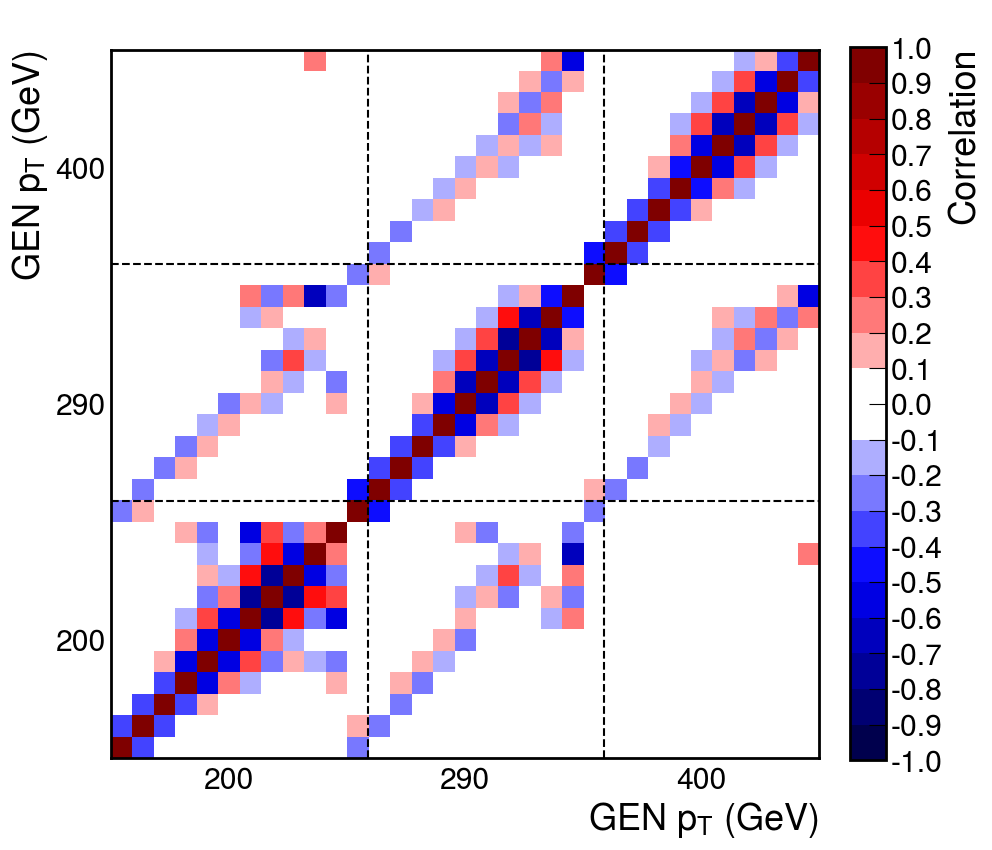

In [52]:
unfolder_orig.plot_correlation()
corr_matrix = unfolder_orig.corr_matrix

In [48]:
if not groomed:
    corr_12 = corr_matrix[30+1, 30+2]
    corr_45 = corr_matrix[30+4, 30+5]
    total_sys_final_bin = stat_dic[ipt]
    
    
    s1 = total_sys_final_bin[0]
    s2 = total_sys_final_bin[1]
    s4 =  total_sys_final_bin[4]
    s5 =  total_sys_final_bin[5]
    
    s1 = np.sqrt(s1**2 + s2**2 + 2*corr_12*s1*s2)
    s4 = np.sqrt(s4**2 + s5**2 + 2*corr_45*s4*s5)
    
    total_sys_final_bin[4] = s4
    total_sys_final_bin = np.delete(total_sys_final_bin, 5)
    total_sys_final_bin[1] = s1
    total_sys_final_bin = np.delete(total_sys_final_bin, 2)
else:
    corr_34 = corr_matrix[30+3, 30+4]
    corr_56 = corr_matrix[30+5, 30+6]
    total_sys_final_bin = stat_dic[ipt]
    
    s3 = total_sys_final_bin[2]
    s4 = total_sys_final_bin[3]
    s5 = total_sys_final_bin[4]
    s6 = total_sys_final_bin[5]
    
    s3 = np.sqrt(s3**2 + s4**2 + 2*corr_34*s3*s4)
    s5 = np.sqrt(s5**2 + s6**2 + 2*corr_56*s5*s6)
    
    total_sys_final_bin[3] = s3
    total_sys_final_bin = np.delete(total_sys_final_bin, 4)
    total_sys_final_bin[5] = s5
    total_sys_final_bin = np.delete(total_sys_final_bin, 6)


IndexError: index 33 is out of bounds for axis 0 with size 33

In [49]:
stat_dic[3]  = total_sys_final_bin

NameError: name 'total_sys_final_bin' is not defined

In [53]:
import pickle
if groomed:
    with open("total_stat_groomed.pkl", "wb") as f:
        pickle.dump(stat_dic, f)
else:
    with open("total_stat_ungroomed.pkl", "wb") as f:
        pickle.dump(stat_dic, f)

In [54]:
stat_dic

{0: array([ 149.12514733,  195.87298771,  115.63721805,  172.25046912,
         219.66035502,  310.58841856,  487.75037255,  198.50879943,
          94.20386257,   41.258773  , 1436.4035937 ]),
 1: array([136.69145632, 115.54240859,  70.8474382 ,  81.51092026,
         93.80519066, 143.95897113, 190.36073972,  97.25647472,
         44.91086862,  41.44275213,  50.60104591]),
 2: array([61.41655682, 66.84635523, 38.31911087, 24.32471715, 25.68805084,
        30.46685348, 26.99386954, 28.57220822, 48.61911996, 41.78701536,
        45.30444371])}